Comprimento total do MST entre as delegacias: 41851.26 metros


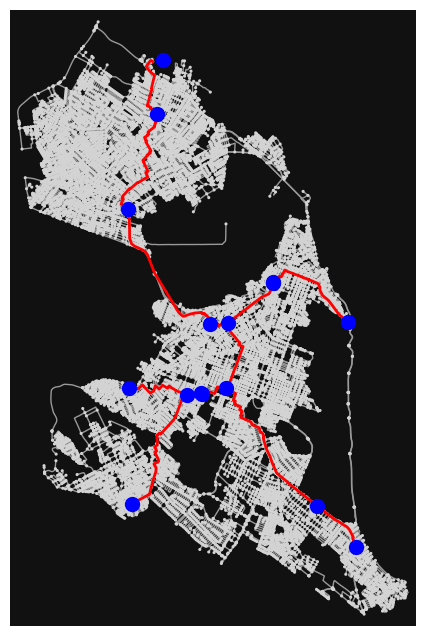

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define as coordenadas das delegacias
delegacias = {
    "1ª Delegacia de Plantão (Zona Sul)": (-5.823623790311422, -35.23120475980301),
    "2ª Delegacia de Plantão (Zona Norte)": (-5.823565086257057, -35.23131204816677),
    "1ª Delegacia de Polícia": (-5.787515466411695, -35.20788653270793),
    "2ª Delegacia de Polícia": (-5.787590185441423, -35.20790799038068),
    "3ª Delegacia de Polícia": (-5.800743430273613, -35.22240591042019),
    "4ª Delegacia de Polícia": (-5.80047180735382, -35.1832776057259),
    "5ª Delegacia de Polícia": (-5.821778388544539, -35.22314558484172),
    "6ª/9ª Delegacia de Polícia": (-5.7637519482642325, -35.25532680758072),
    "7ª Delegacia de Polícia": (-5.800978950240514, -35.228353513350484),
    "8ª Delegacia de Polícia": (-5.824101159612703, -35.23592344619821),
    "10ª Delegacia de Polícia": (-5.860053284296015, -35.19355212157911),
    "11ª Delegacia de Polícia": (-5.859422354285404, -35.25376664497514),
    "12ª Delegacia de Polícia": (-5.715266281739625, -35.24393768194995),
    "13ª Delegacia de Polícia": (-5.732872218369603, -35.24583717689029),
    "14ª Delegacia de Polícia": (-5.821870806181884, -35.25500840387087),
    "15ª Delegacia de Polícia": (-5.873476461416471, -35.18061049223425)
}
# Obtém o grafo da cidade de Natal
place = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(place, network_type='drive')

# Converte o grafo para não direcionado
G_undirected = G.to_undirected()

# Encontra os nós mais próximos de cada delegacia
delegacia_nodes = [ox.distance.nearest_nodes(G_undirected, lon, lat) for lat, lon in delegacias.values()]

# Cria um grafo completo com as distâncias entre as delegacias
G_delegacias = nx.Graph()
for i in range(len(delegacia_nodes)):
    for j in range(i + 1, len(delegacia_nodes)):
        distancia = nx.shortest_path_length(G_undirected, source=delegacia_nodes[i], target=delegacia_nodes[j], weight='length')
        G_delegacias.add_edge(i, j, weight=distancia)

# Calcula o MST
mst = nx.minimum_spanning_tree(G_delegacias)
mst_edges = list(mst.edges(data=True))
total_mst_length = sum([data['weight'] for _, _, data in mst_edges])

print("Comprimento total do MST entre as delegacias:", total_mst_length, "metros")

# Plota o MST
fig, ax = ox.plot_graph(G_undirected, show=False, close=False, node_color='lightgray', node_size=5)

# Plota as arestas do MST
for u, v, data in mst_edges:
    orig_node = delegacia_nodes[u]
    dest_node = delegacia_nodes[v]
    route = nx.shortest_path(G_undirected, source=orig_node, target=dest_node, weight="length")
    x = [G_undirected.nodes[node]['x'] for node in route]
    y = [G_undirected.nodes[node]['y'] for node in route]
    ax.plot(x, y, color='red', linewidth=2)

# Plota as delegacias
for lat, lon in delegacias.values():
    ax.plot(lon, lat, marker='o', color='blue', markersize=10)

plt.show()